In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
plt.style.use('ggplot')

### ForwardProgress vs NetSize

In [28]:
runs = []
for file in glob.iglob("./data/fProgress.delay*.size*trial.*.csv"):
    trial = re.search(r"trial\.([0-9]+)", file).group(1)
    data = pd.read_csv(file)
    data['Trial'] = int(trial)
    runs.append(data)
runs = pd.concat(runs, ignore_index = True)

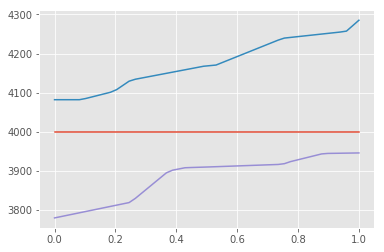

In [98]:
a = runs.groupby(["Trial","Peer"])[["Delay"]].max()
b = a.groupby(["Trial"])
qs = np.linspace(0,1)
c = b.quantile(qs).groupby(level=1)[["Delay"]]

plt.plot(qs, c.median())
plt.plot(qs, c.max())
plt.plot(qs, c.min())


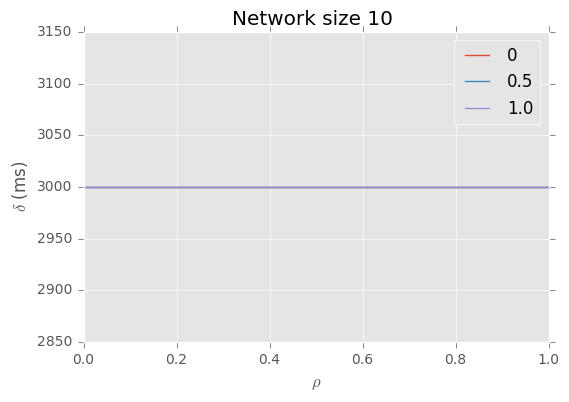

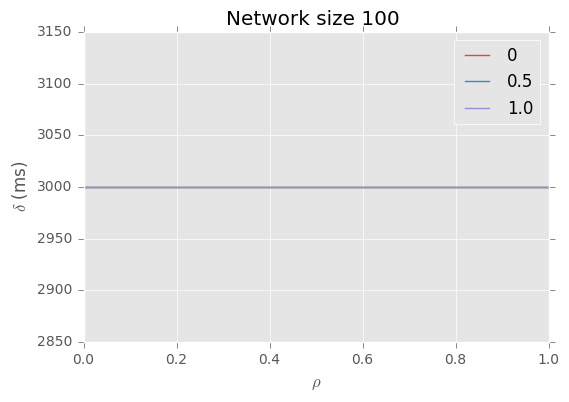

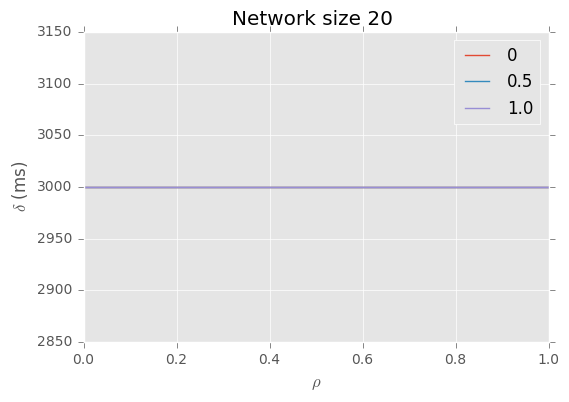

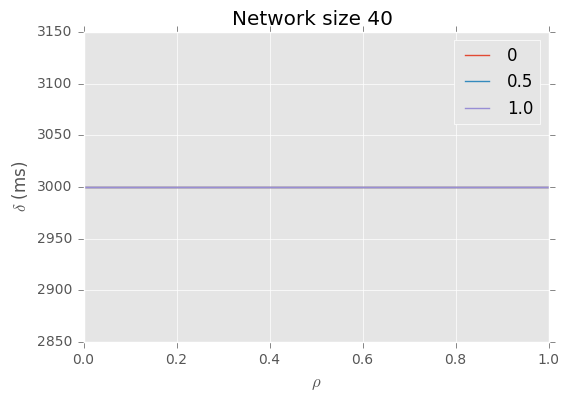

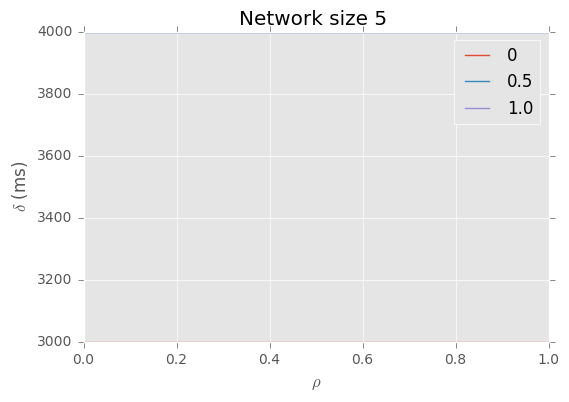

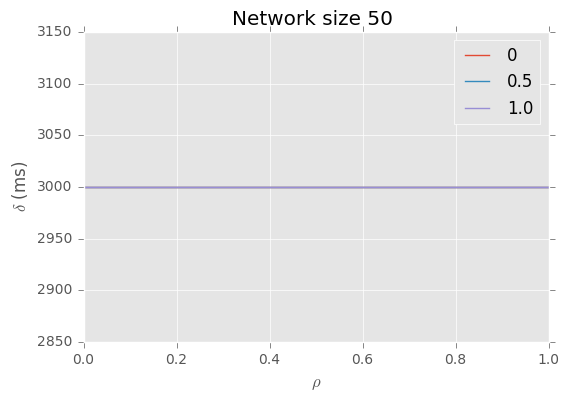

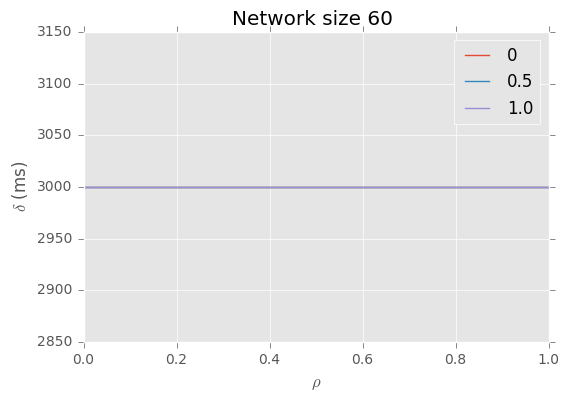

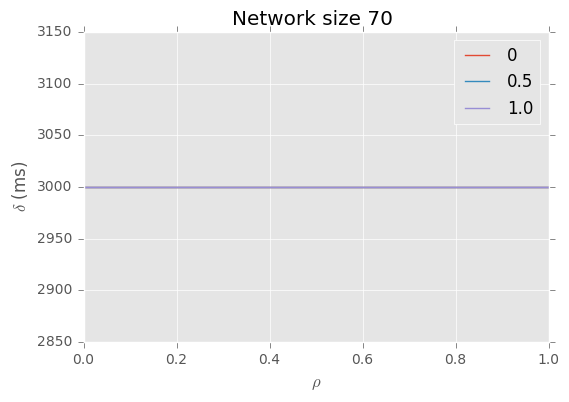

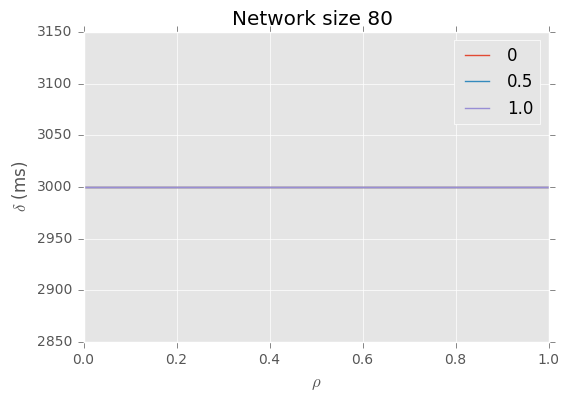

In [24]:
maxProgress = []
for file in glob.iglob("./sizeData/fProgress.delay*.size*.csv"):
    size = re.search(r"size([0-9]+)", file).group(1)
    fProgress = pd.read_csv(file)
    ps = np.linspace(0,1)
    byID = fProgress.groupby("Peer")
    plt.figure()
    for q in [0, 0.5, 1.0]:
        # First quantile is over delays for all ledgers for each peer
        # Second quantile is over the first quantile delay for all peers
        delayPerPeer = byID["Delay"].quantile(q, interpolation='lower')
        qs = delayPerPeer.quantile(ps, interpolation='lower')
        plt.plot(ps, qs, label = q)
    maxProgress.append({"NetSize" : int(size), "ProgressDelay" : fProgress["Delay"].max()})
    plt.legend(loc = 'best')
    plt.xlabel(r"$\rho$")
    plt.ylabel(r"$\delta$ (ms)")
    plt.title(r"Network size {0} ".format(size))

maxProgress = pd.DataFrame(maxProgress).sort_values("NetSize")

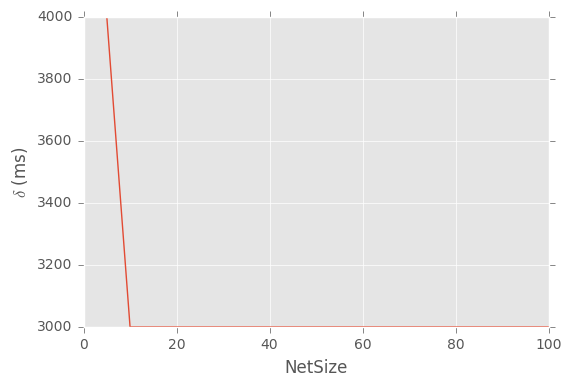

In [25]:
plt.plot(maxProgress["NetSize"], maxProgress["ProgressDelay"])
plt.xlabel("NetSize")
plt.ylabel(r"$\delta$ (ms)")


In [26]:
maxProgress

,NetSize,ProgressDelay
4,5,4000
0,10,3000
2,20,3000
3,40,3000
5,50,3000
6,60,3000
7,70,3000
8,80,3000
1,100,3000


### Tx Progress vs NetDelay

In [31]:
txRuns = []
for file in glob.iglob("./data/txProgress.delay*.size*trial.*.csv"):
    trial = re.search(r"trial\.([0-9]+)", file).group(1)
    data = pd.read_csv(file)
    data['Trial'] = int(trial)
    txRuns.append(data)
txRuns = pd.concat(txRuns, ignore_index = True)

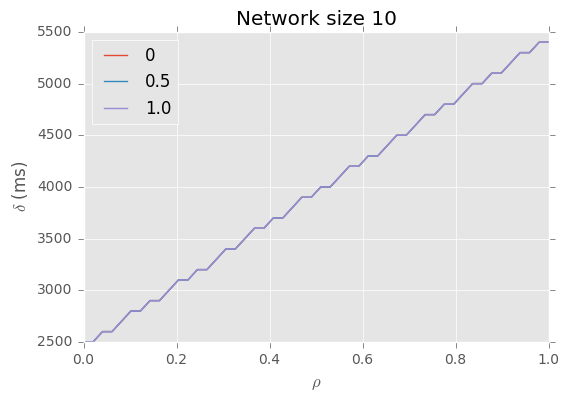

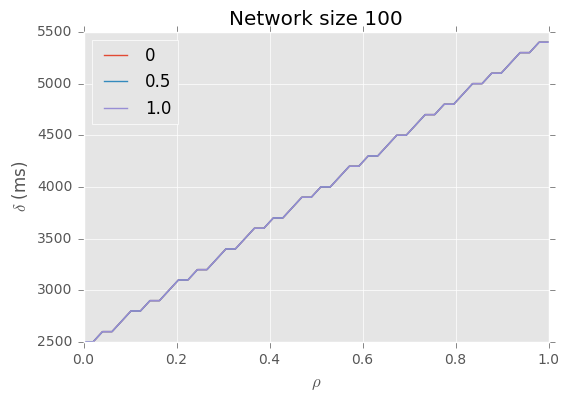

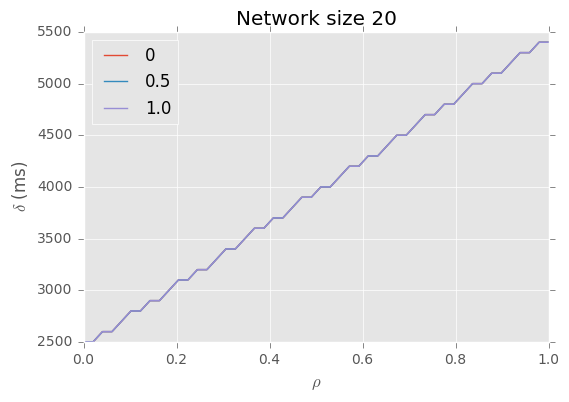

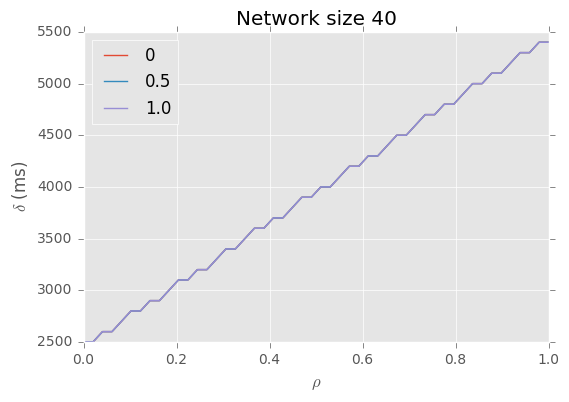

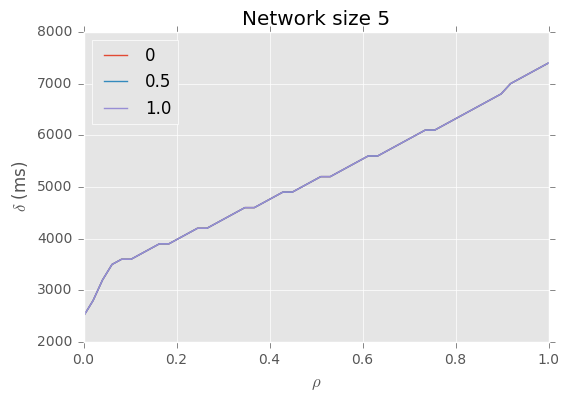

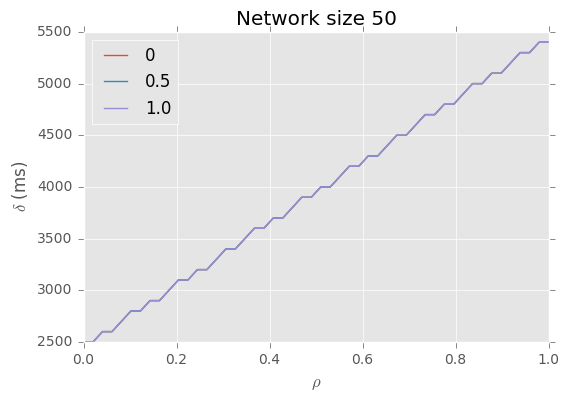

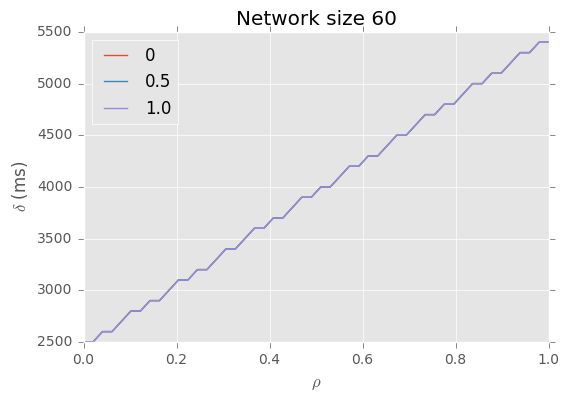

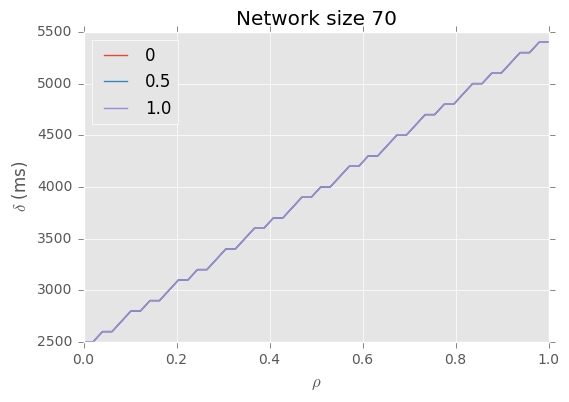

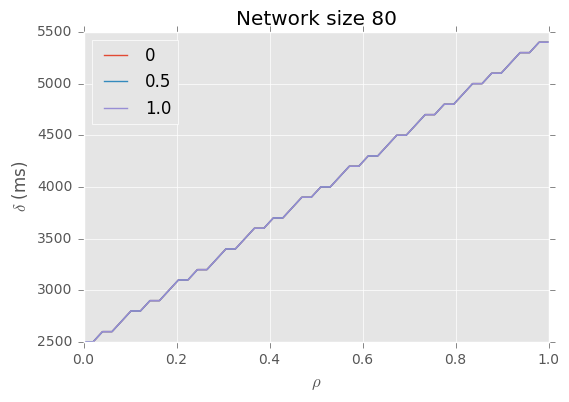

In [27]:
maxTxProgress = []
for file in glob.iglob("./sizeData/txProgress.delay*.size*.csv"):
    size = re.search(r"size([0-9]+)", file).group(1)
    txProgress = pd.read_csv(file)

    ps = np.linspace(0,1)
    byID = txProgress.groupby("TxID")
    plt.figure()
    for q in [0, 0.5, 1.0]:
        # First quantile is over delays of a specific transaction for each peer
        # Second quantile is over the first quantile delay for all transactions
        delayPerTx = byID["Delay"].quantile(q, interpolation='lower')
        qs = delayPerTx.quantile(ps, interpolation='lower')
        plt.plot(ps, qs, label = q)
    maxTxProgress.append({"NetSize" : int(size), "TxProgressDelay" : txProgress["Delay"].max()})
    plt.legend(loc = 'best')
    plt.xlabel(r"$\rho$")
    plt.ylabel(r"$\delta$ (ms)")
    plt.title(r"Network size {0}".format(size))
maxTxProgress = pd.DataFrame(maxTxProgress).sort_values("NetSize")

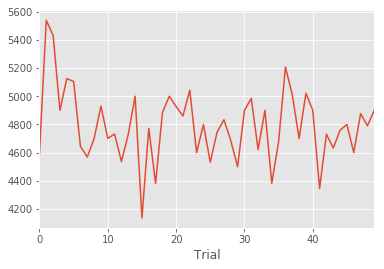

In [34]:
(txRuns.groupby("Trial")["Delay"].max() - txRuns.groupby("Trial")["Delay"].min()).plot()

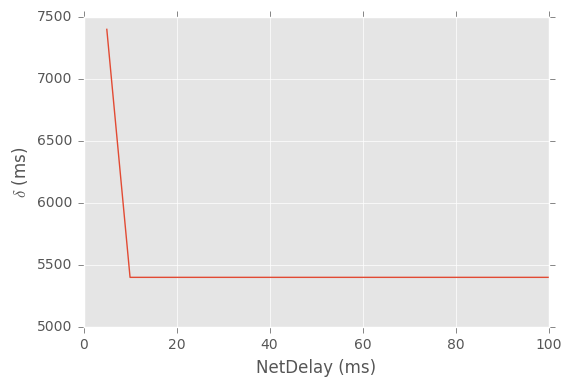

In [28]:
plt.plot(maxTxProgress["NetSize"], maxTxProgress["TxProgressDelay"])
plt.xlabel("NetDelay (ms)")
plt.ylabel(r"$\delta$ (ms)")


In [29]:
maxTxProgress

,NetSize,TxProgressDelay
4,5,7400
0,10,5400
2,20,5400
3,40,5400
5,50,5400
6,60,5400
7,70,5400
8,80,5400
1,100,5400
